<a href="https://www.kaggle.com/chandanarprasad/netflix-analysis-detailed-eda-plots?scriptVersionId=82507904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling as pp

## Reading the Data

In [3]:
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
! pip show pandas-profiling

Name: pandas-profiling
Version: 3.0.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /opt/conda/lib/python3.7/site-packages
Requires: requests, joblib, phik, seaborn, htmlmin, jinja2, numpy, missingno, scipy, pydantic, pandas, visions, PyYAML, tqdm, matplotlib, tangled-up-in-unicode
Required-by: 


In [6]:
Profile_report = pp.ProfileReport(df,title='Netflix data')


In [7]:
Profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.shape

(8807, 12)

## Dealing with missing values

In [11]:
df.isna().any().sum()

6

In [12]:
df.columns[df.isna().any()].tolist()

['director', 'cast', 'country', 'date_added', 'rating', 'duration']

In [13]:
df[pd.isnull(df).any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [14]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

In [15]:
df.shape

(8807, 12)

In [16]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

## Perhaps fillna with 'unknown' etc(?)

In [17]:
df.shape

(5332, 12)

## Closer look at the data

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,5332.0,2012.742123,9.625831,1942.0,2011.0,2016.0,2018.0,2021.0


In [19]:
df.describe(include='object').T

,count,unique,top,freq
show_id,5332,5332,s8,1
type,5332,2,Movie,5185
title,5332,5332,Sankofa,1
director,5332,3945,"Raúl Campos, Jan Suter",18
cast,5332,5200,Samuel West,10
country,5332,604,United States,1846
date_added,5332,1453,"January 1, 2020",92
rating,5332,14,TV-MA,1822
duration,5332,198,94 min,135
listed_in,5332,335,"Dramas, International Movies",336


In [20]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# Univariate Analysis

## Column: 'show_id'

In [21]:
df.show_id.head(10)

0     s8
1     s9
2    s10
3    s13
4    s25
5    s28
6    s29
7    s30
8    s39
9    s42
Name: show_id, dtype: object

In [22]:
df.show_id.shape

(5332,)

In [23]:
df.show_id.nunique()

5332

## Column: 'type'

In [24]:
df.type.head()

0      Movie
1    TV Show
2      Movie
3      Movie
4      Movie
Name: type, dtype: object

In [25]:
df.type.value_counts()

Movie      5185
TV Show     147
Name: type, dtype: int64

<AxesSubplot:>

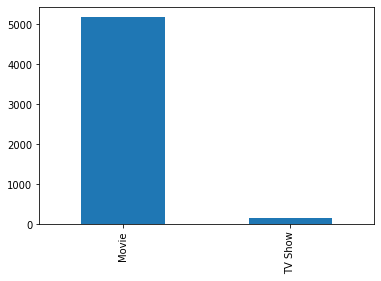

In [26]:
df.type.value_counts().plot(kind='bar')

## Column: 'title'

In [27]:
df.title.head()

0                          Sankofa
1    The Great British Baking Show
2                     The Starling
3                     Je Suis Karl
4                            Jeans
Name: title, dtype: object

In [28]:
df.title.shape

(5332,)

In [29]:
df.title.nunique()

5332

## Column: 'director'

In [30]:
df.director.head()

0           Haile Gerima
1        Andy Devonshire
2         Theodore Melfi
3    Christian Schwochow
4             S. Shankar
Name: director, dtype: object

In [31]:
df.director.shape

(5332,)

In [32]:
df.director.nunique()

3945

In [33]:
ids = df.director
directors_multiple_content = df[ids.isin(ids[ids.duplicated()])]
directors_multiple_content.shape

(2134, 12)

In [34]:
directors_multiple_content.director.value_counts().sort_index()

A. L. Vijay                                            2
Aaron Sorkin                                           2
Abba T. Makama                                         2
Abbas Alibhai Burmawalla, Mastan Alibhai Burmawalla    4
Abhinay Deo                                            3
                                                      ..
Zoya Akhtar                                            3
Àlex Pastor, David Pastor                              2
Álex de la Iglesia                                     2
Ömer Faruk Sorak                                       2
Şenol Sönmez                                           2
Name: director, Length: 747, dtype: int64

## Column: 'cast'

In [35]:
df.cast.head()

0    Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
1    Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
2    Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
3    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
4    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...
Name: cast, dtype: object

In [36]:
df.cast.shape

(5332,)

In [37]:
df.cast.nunique()

5200

In [38]:
ids = df.cast
cast_multiple_content = df[ids.isin(ids[ids.duplicated()])]
cast_multiple_content.shape

(213, 12)

In [39]:
cast_multiple_content.cast.value_counts().sort_index()

Agustín Aristarán                                                                                                                                            2
Alan Saldaña                                                                                                                                                 2
Alden Ehrenreich, Woody Harrelson, Emilia Clarke, Donald Glover, Joonas Suotamo, Thandie Newton, Phoebe Waller-Bridge, Paul Bettany                          2
Alex Fernández                                                                                                                                               2
Ali Wong                                                                                                                                                     2
                                                                                                                                                            ..
Tom Segura                                    

In [40]:
# check = df
# check.explode('cast')

## Column: 'country'

In [41]:
df.country.head()

0    United States, Ghana, Burkina Faso, United Kin...
1                                       United Kingdom
2                                        United States
3                              Germany, Czech Republic
4                                                India
Name: country, dtype: object

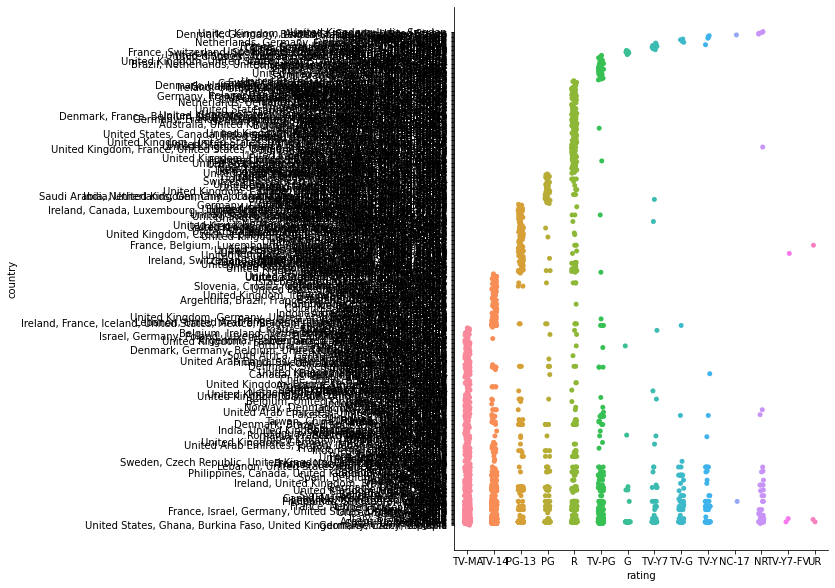

In [42]:
sns.catplot(x="rating", y="country", data=df,height=8.27, aspect=11.7/8.27)

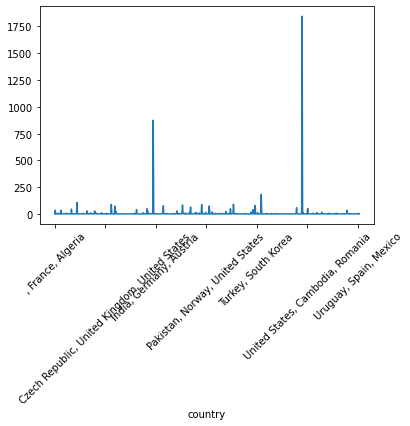

In [43]:
data = df
data = df.groupby(['country']).count()['type']
# print(data)
# data.unstack().plot()
data.plot()
plt.xticks(rotation=45)
plt.show()

## column: 'date_added'

In [44]:
df.date_added.dtype

dtype('O')

In [45]:
df.date_added.head()

0    September 24, 2021
1    September 24, 2021
2    September 24, 2021
3    September 23, 2021
4    September 21, 2021
Name: date_added, dtype: object

In [46]:
# df.date_added = df.date_added.astype('str') 

In [47]:
df.date_added.dtype

dtype('O')

## Column: 'release_year'

In [48]:
df.release_year.head()

0    1993
1    2021
2    2021
3    2021
4    1998
Name: release_year, dtype: int64

In [49]:
df.release_year.shape

(5332,)

In [50]:
df.release_year.nunique()

72

In [51]:
df.release_year.value_counts(bins=12).sort_values()

(1941.92, 1948.583]        5
(1948.583, 1955.167]       5
(1955.167, 1961.75]       10
(1961.75, 1968.333]       16
(1968.333, 1974.917]      29
(1974.917, 1981.5]        57
(1981.5, 1988.083]        77
(1988.083, 1994.667]     107
(1994.667, 2001.25]      207
(2001.25, 2007.833]      367
(2007.833, 2014.417]    1099
(2014.417, 2021.0]      3353
Name: release_year, dtype: int64

<AxesSubplot:>

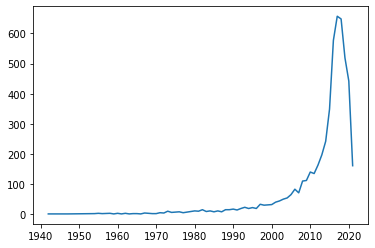

In [52]:
df.release_year.value_counts().sort_index().plot()

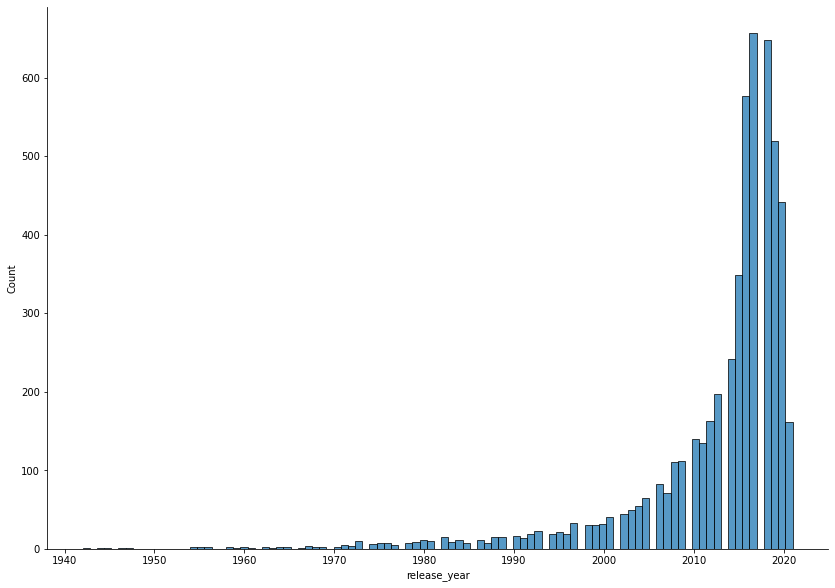

In [53]:
sns.displot(data=df,x='release_year',height=8.27, aspect=11.7/8.27)

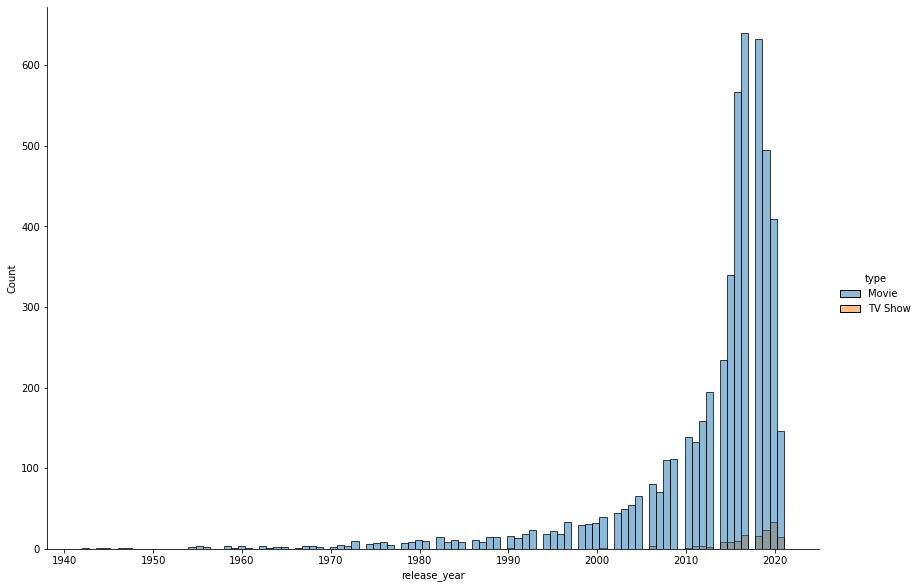

In [54]:
sns.displot(data=df,x='release_year',hue='type',height=8.27, aspect=11.7/8.27)

In [55]:
ids = df.release_year
release_year_multiple_content = df[ids.isin(ids[ids.duplicated()])]
release_year_multiple_content.shape

(5323, 12)

In [56]:
release_year_multiple_content.release_year.value_counts().sort_index()

1954      2
1955      3
1956      2
1958      3
1960      3
       ... 
2017    657
2018    648
2019    519
2020    442
2021    161
Name: release_year, Length: 63, dtype: int64

## Column: 'rating'

In [57]:
df.rating.head()

0    TV-MA
1    TV-14
2    PG-13
3    TV-MA
4    TV-14
Name: rating, dtype: object

In [58]:
df.rating.value_counts().sort_index()

G             40
NC-17          2
NR            58
PG           275
PG-13        470
R            778
TV-14       1214
TV-G          84
TV-MA       1822
TV-PG        431
TV-Y          76
TV-Y7         76
TV-Y7-FV       3
UR             3
Name: rating, dtype: int64

<AxesSubplot:>

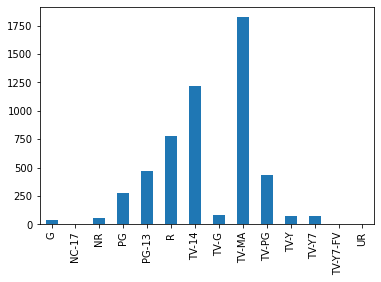

In [59]:
df.rating.value_counts().sort_index().plot(kind='bar')

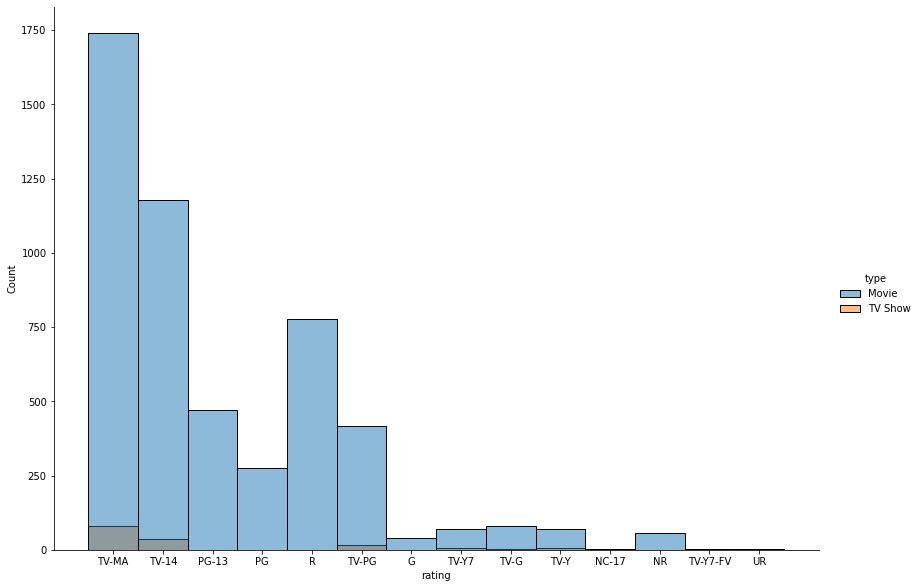

In [60]:
sns.displot(data=df,x='rating',hue='type',height=8.27, aspect=11.7/8.27)

In [61]:
df.sort_values('rating', ascending=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1682,s3063,Movie,Jimmy Neutron: Boy Genius,John A. Davis,"Debi Derryberry, Jeffrey Garcia, Rob Paulsen, ...","United States, Spain","January 1, 2020",2001,G,83 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When gooey green aliens kidnap all the adults ...
5090,s8467,Movie,The Princess and the Frog,"Ron Clements, John Musker","Anika Noni Rose, Bruno Campos, Keith David, Mi...",United States,"July 16, 2019",2009,G,98 min,Children & Family Movies,"In New Orleans during the Jazz Age, a beautifu..."
3091,s5597,Movie,Growing Up Wild,Keith Scholey,Daveed Diggs,United States,"February 19, 2017",2016,G,78 min,"Children & Family Movies, Documentaries",Five baby animals from different parts of the ...
3092,s5598,Movie,Tini: The New Life of Violetta,Juan Pablo Buscarini,"Martina Stoessel, Jorge Blanco, Adrián Salzedo...","Spain, Italy, Argentina","February 19, 2017",2016,G,99 min,"Children & Family Movies, Music & Musicals","After completing a world tour, a teen pop star..."
5086,s8462,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,"January 1, 2021",2004,G,100 min,Children & Family Movies,"In this warm-hearted tale, a young boy's faith..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4421,s7514,Movie,Motu Patlu: King of Kings,Suhas Kadav,"Saurav Chakrabarty, Vinay Pathak",India,"July 6, 2017",2016,TV-Y7-FV,109 min,"Children & Family Movies, Comedies",Motu and Patlu want to help a circus lion get ...
3771,s6582,Movie,Dear Dracula,Chad Van De Keere,"Nathan Gamble, Ray Liotta, Emilio Estevez, Ari...",United States,"February 18, 2016",2012,TV-Y7-FV,43 min,"Children & Family Movies, Comedies",When he gets a fan letter from a young monster...
4743,s7989,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",2016,UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
5320,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...


## Column: 'duration'

In [62]:
df.duration.head(20)

0       125 min
1     9 Seasons
2       104 min
3       127 min
4       166 min
5       103 min
6        97 min
7       106 min
8        96 min
9       124 min
10      116 min
11       98 min
12       91 min
13      115 min
14      122 min
15       99 min
16       99 min
17       88 min
18      100 min
19      102 min
Name: duration, dtype: object

In [63]:
df.duration.value_counts(ascending = False)

94 min     135
93 min     130
97 min     129
95 min     127
90 min     123
          ... 
189 min      1
229 min      1
237 min      1
214 min      1
191 min      1
Name: duration, Length: 198, dtype: int64

## Column: 'listed_in'

In [64]:
df.listed_in.head()

0    Dramas, Independent Movies, International Movies
1                        British TV Shows, Reality TV
2                                    Comedies, Dramas
3                        Dramas, International Movies
4     Comedies, International Movies, Romantic Movies
Name: listed_in, dtype: object

In [65]:
df.listed_in.value_counts()

Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: listed_in, Length: 335, dtype: int64

## Column: 'description'

In [66]:
df.description.head()

0    On a photo shoot in Ghana, an American model s...
1    A talented batch of amateur bakers face off in...
2    A woman adjusting to life after a loss contend...
3    After most of her family is murdered in a terr...
4    When the father of the man she loves insists t...
Name: description, dtype: object

In [67]:
df.description.dtype

dtype('O')